<a href="https://colab.research.google.com/github/muhammad-afifudin/E41220777_MuhammadAfifudin_A/blob/main/Modeling_KNeighbors_FinPockets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import tensorflow as tf
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/HaibaraAi-afk/Capstone/refs/heads/main/Dataset/converted_data.csv?token=GHSAT0AAAAAACX26274XJYSFK23IZKQHISYZZZN7FA')
df

,Income,Age,Dependents,Occupation,City_Tier,Bills,Bills_Percentage,Groceries,Groceries_Percentage,Transport,...,Entertainment,Entertainment_Percentage,Healthcare,Healthcare_Percentage,Education,Education_Percentage,Utilities,Utilities_Percentage,Disposable_Income,Disposable_Income_Percentage
0,8.352969e+06,49,0,Self_Employed,Tier_1,2.918791e+06,34.943159,1.555157e+06,18.618016,4.934563e+05,...,287466.159731,3.441485,289474.117741,3.465524,0.000000e+00,0.000000,7.004870e+05,8.386084,2.108137e+06,25.238176
1,5.026049e+06,34,2,Retired,Tier_2,1.167924e+06,23.237409,6.489336e+05,12.911406,2.887451e+05,...,196531.736343,3.910263,212832.553465,4.234590,2.903740e+05,5.777380,4.098855e+05,8.155223,1.810823e+06,36.028758
2,9.425290e+06,35,1,Student,Tier_3,2.688879e+06,28.528345,1.464673e+06,15.539823,6.028199e+05,...,322482.425043,3.421459,407665.670509,4.325232,5.913357e+05,6.273926,7.479265e+05,7.935315,2.599507e+06,27.580129
3,1.898539e+07,21,0,Self_Employed,Tier_3,5.037016e+06,26.531014,3.692149e+06,19.447323,1.329770e+06,...,534853.888180,2.817187,855393.351856,4.505536,0.000000e+00,0.000000,1.619536e+06,8.530437,5.916668e+06,31.164326
4,4.654912e+06,52,4,Professional,Tier_2,1.632442e+06,35.069242,6.974629e+05,14.983374,2.388069e+05,...,123540.765529,2.653987,218772.900043,4.699829,2.704432e+05,5.809846,3.009423e+05,6.465049,1.172501e+06,25.188459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7.656137e+06,51,4,Self_Employed,Tier_1,4.046629e+06,52.854712,1.389138e+06,18.144113,3.900220e+05,...,226512.435100,2.958573,362811.720034,4.738835,5.316953e+05,6.944694,4.916365e+05,6.421470,2.176918e+05,2.843363
19996,1.689705e+07,21,1,Student,Tier_2,3.897870e+06,23.068349,3.160465e+06,18.704244,8.669936e+05,...,440954.684321,2.609655,510228.934156,3.019634,9.888752e+05,5.852355,1.282058e+06,7.587470,5.749602e+06,34.027258
19997,7.598333e+06,30,1,Professional,Tier_2,3.323259e+06,43.736682,1.293923e+06,17.029037,4.666206e+05,...,294151.724746,3.871267,379012.834369,4.988105,7.317656e+05,9.630608,6.852074e+05,9.017865,4.243931e+05,5.585345
19998,2.211087e+07,27,2,Professional,Tier_1,9.829738e+06,44.456583,3.543841e+06,16.027596,1.543494e+06,...,883589.021876,3.996174,992605.633029,4.489220,1.167190e+06,5.278804,2.166147e+06,9.796752,1.984268e+06,8.974171


#Data Preprocessing

In [4]:
df.head()

,Income,Age,Dependents,Occupation,City_Tier,Bills,Bills_Percentage,Groceries,Groceries_Percentage,Transport,...,Entertainment,Entertainment_Percentage,Healthcare,Healthcare_Percentage,Education,Education_Percentage,Utilities,Utilities_Percentage,Disposable_Income,Disposable_Income_Percentage
0,8.352969e+06,49,0,Self_Employed,Tier_1,2.918791e+06,34.943159,1.555157e+06,18.618016,4.934563e+05,...,287466.159731,3.441485,289474.117741,3.465524,0.000000,0.000000,7.004870e+05,8.386084,2.108137e+06,25.238176
1,5.026049e+06,34,2,Retired,Tier_2,1.167924e+06,23.237409,6.489336e+05,12.911406,2.887451e+05,...,196531.736343,3.910263,212832.553465,4.234590,290373.956254,5.777380,4.098855e+05,8.155223,1.810823e+06,36.028758
2,9.425290e+06,35,1,Student,Tier_3,2.688879e+06,28.528345,1.464673e+06,15.539823,6.028199e+05,...,322482.425043,3.421459,407665.670509,4.325232,591335.721401,6.273926,7.479265e+05,7.935315,2.599507e+06,27.580129
3,1.898539e+07,21,0,Self_Employed,Tier_3,5.037016e+06,26.531014,3.692149e+06,19.447323,1.329770e+06,...,534853.888180,2.817187,855393.351856,4.505536,0.000000,0.000000,1.619536e+06,8.530437,5.916668e+06,31.164326
4,4.654912e+06,52,4,Professional,Tier_2,1.632442e+06,35.069242,6.974629e+05,14.983374,2.388069e+05,...,123540.765529,2.653987,218772.900043,4.699829,270443.212734,5.809846,3.009423e+05,6.465049,1.172501e+06,25.188459


In [5]:
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Bills,0
Bills_Percentage,0
Groceries,0
Groceries_Percentage,0
Transport,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Income                        20000 non-null  float64
 1   Age                           20000 non-null  int64  
 2   Dependents                    20000 non-null  int64  
 3   Occupation                    20000 non-null  object 
 4   City_Tier                     20000 non-null  object 
 5   Bills                         20000 non-null  float64
 6   Bills_Percentage              20000 non-null  float64
 7   Groceries                     20000 non-null  float64
 8   Groceries_Percentage          20000 non-null  float64
 9   Transport                     20000 non-null  float64
 10  Transport_Percentage          20000 non-null  float64
 11  Entertainment                 20000 non-null  float64
 12  Entertainment_Percentage      20000 non-null  float64
 13  H

In [7]:
df = df.drop(columns=["Occupation", "City_Tier",])

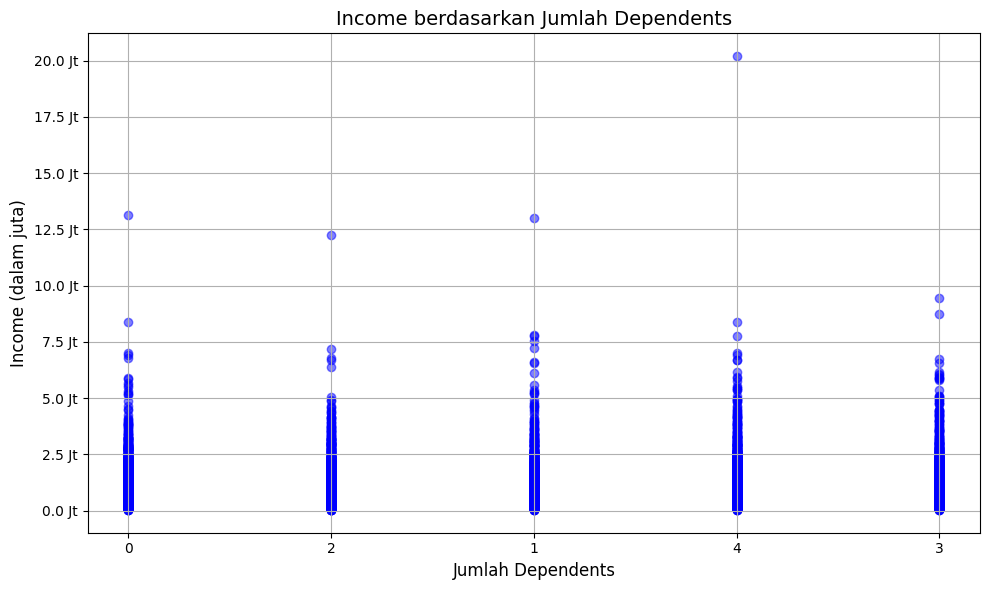

In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
df['Dependents'] = df['Dependents'].astype(str)

# Fungsi untuk mengubah format sumbu Y
def format_func(value, tick_number):
    return f'{value/1e7:.1f} Jt'  # Mengubah ke juta

plt.figure(figsize=(10, 6))
plt.scatter(df['Dependents'], df['Income'], color='blue', alpha=0.5)  # Menggunakan scatter plot
plt.ylabel('Income (dalam juta)', fontsize=12)
plt.xlabel('Jumlah Dependents', fontsize=12)
plt.title('Income berdasarkan Jumlah Dependents', fontsize=14)

# Mengatur format sumbu Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_func))

# Mengatur batas sumbu X
plt.xticks(df['Dependents'].unique())
plt.grid(True)
plt.tight_layout()
plt.show()

In [9]:
# Feature Engineering
df['Log_Income'] = np.log1p(df['Income'])  # Transformasi logaritmik
df['Income_Age_Interaction'] = df['Income'] * df['Age']  # Fitur interaksi

In [10]:
print(df['Income'].min(), df['Income'].max())

243491.18554100016 202049570.5362793


In [11]:
# Memilih fitur dan target
X = df[['Income', 'Age', 'Dependents']]
y = df[['Bills', 'Groceries', 'Transport', 'Entertainment', 'Healthcare', 'Education', 'Utilities', 'Disposable_Income']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
def cross_val(model):
    # Menghitung skor cross-validation untuk model yang diberikan
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()  # Mengembalikan rata-rata skor

# Evaluasi Model
def print_evaluate(y_true, y_pred, set_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{set_name} Evaluation:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")
    print("-" * 30)



def evaluate(true, predicted):
    # Menghitung dan mengembalikan berbagai metrik evaluasi
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
def add_model_results(results_df, model_name, y_true, y_pred, best_params, model):
    """
    Menambahkan hasil evaluasi model ke dalam DataFrame.

    Parameters:
    - results_df: DataFrame yang ada untuk menyimpan hasil.
    - model_name: Nama model yang digunakan.
    - y_true: Nilai sebenarnya dari target.
    - y_pred: Nilai prediksi dari model.
    - best_params: Parameter terbaik dari model.
    - model: Model yang digunakan untuk cross-validation.

    Returns:
    - DataFrame yang diperbarui dengan hasil baru.
    """
    # Evaluasi model
    mae, mse, rmse, r2_square = evaluate(y_true, y_pred)

    # Cross-validation
    cross_val_score = cross_val(model)  # Pastikan fungsi cross_val sudah didefinisikan

    # Membuat DataFrame baru untuk hasil model
    results_df_new = pd.DataFrame(data=[
        [model_name,
         mae, mse, rmse, r2_square,
         best_params,
         cross_val_score]
    ],
    columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Best Parameters', 'Cross_Val'])

    # Menggabungkan DataFrame baru dengan DataFrame yang ada
    results_df = pd.concat([results_df, results_df_new], ignore_index=True)

    return results_df

#EDA

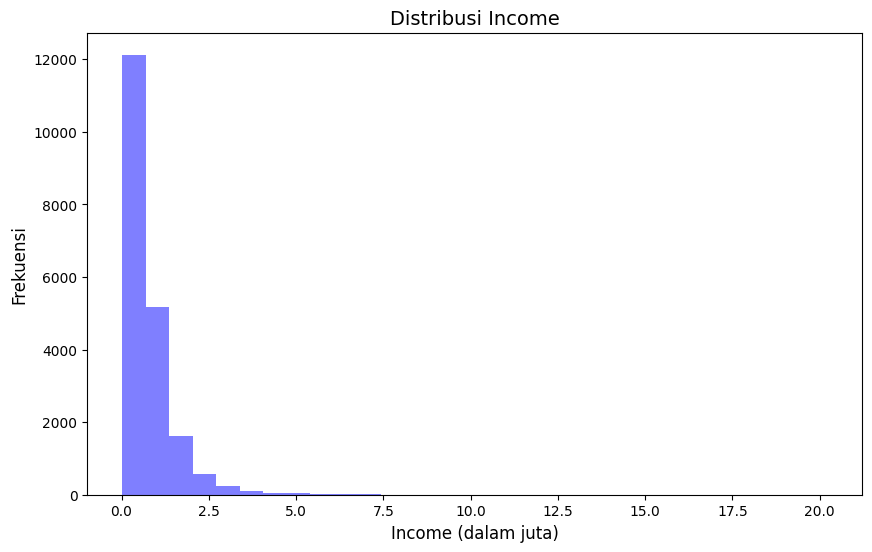

In [16]:
plt.figure(figsize=(10, 6))
plt.hist(df['Income'] / 1e7, bins=30, color='Blue', alpha=0.5)
plt.xlabel('Income (dalam juta)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.title('Distribusi Income', fontsize=14)
plt.show()

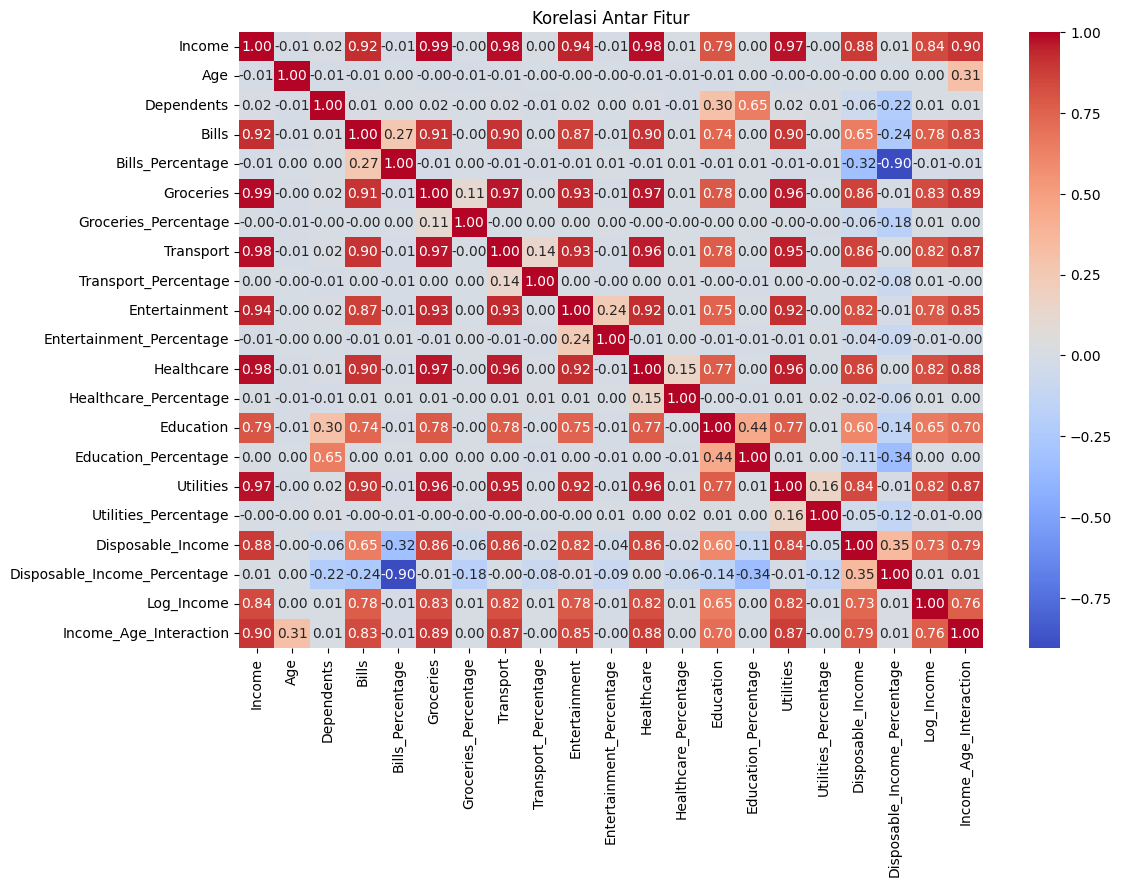

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

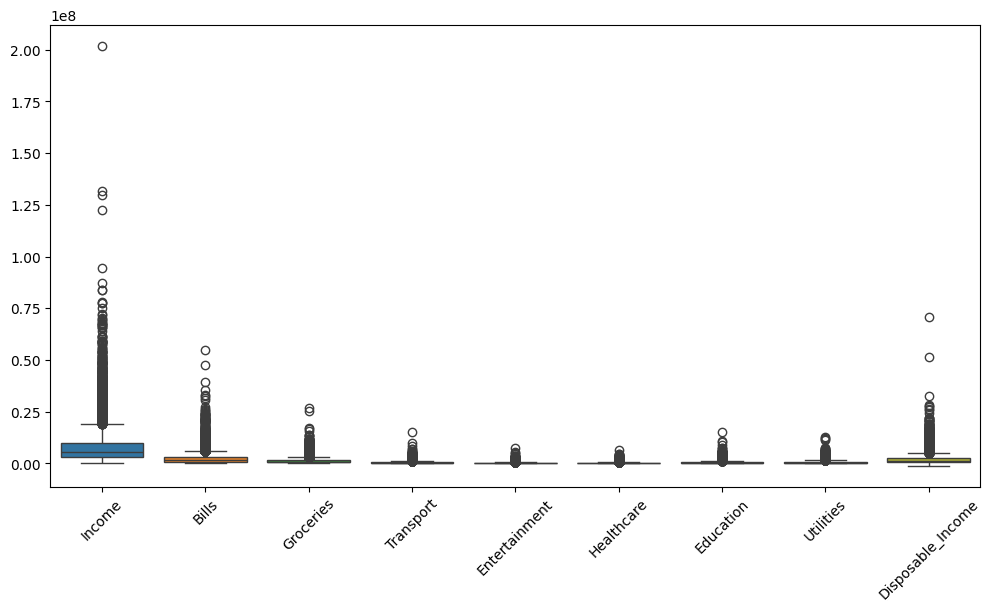

In [18]:
# Visualisasi outlier menggunakan boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Income', 'Bills', 'Groceries', 'Transport', 'Entertainment', 'Healthcare', 'Education', 'Utilities', 'Disposable_Income']])
plt.xticks(rotation=45)
plt.show()

#Modeling KNeighbors


In [19]:
# Mendefinisikan Parameter Grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],               # Jumlah tetangga
    'weights': ['uniform', 'distance'],        # Metode pemberian bobot
    'p': [1, 2]                                # Jenis jarak: 1 untuk Manhattan, 2 untuk Euclidean
}

# Inisialisasi model KNeighborsRegressor
knn = KNeighborsRegressor()

# Grid Search
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,              # 5-fold cross-validation
    n_jobs=-1,         # Gunakan semua core
    scoring='accuracy' # Metode evaluasi
)

# Melatih model
grid_search.fit(X_train_scaled, y_train)

# Dapatkan Model Terbaik
best_knn = grid_search.best_estimator_

model = best_knn

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:1103: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


In [20]:
#Cetak Parameter Terbaik
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [21]:
train_pred = best_knn.predict(X_train_scaled)
test_pred = best_knn.predict(X_test_scaled)

In [22]:
#Evaluasi Model
print('Test set evaluation:')
print_evaluate(y_test, test_pred, set_name='Test Set')
print('Train set evaluation:')
print_evaluate(y_train, train_pred, set_name='Train Set')

Test set evaluation:
Test Set Evaluation:
MAE: 226805.87
MSE: 397731270234.43
RMSE: 630659.39
R²: 0.8703
------------------------------
Train set evaluation:
Train Set Evaluation:
MAE: 158242.47
MSE: 168872967427.43
RMSE: 410941.56
R²: 0.9386
------------------------------


In [23]:
results_df = pd.DataFrame(data=[
    ["KNeighbors Regressor",
     *evaluate(y_test, test_pred),
     grid_search.best_params_,
     cross_val(model)]
],
columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', 'Best Parameters', 'Cross_Val'])

In [24]:
results_df

,Model,MAE,MSE,RMSE,R2 Square,Best Parameters,Cross_Val
0,KNeighbors Regressor,226805.87423,3.977313e+11,630659.393202,0.870312,"{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}",0.827224


#Testing

In [25]:
def test_model(model, scaler):
   # Mengambil input dari pengguna
    income = float(input("Masukkan Income: "))
    age = float(input("Masukkan Age: "))
    dependents = int(input("Masukkan Jumlah Dependents: "))

    # Membuat DataFrame dari input
    input_data = pd.DataFrame([[income, age, dependents]], columns=['Income', 'Age', 'Dependents'])

    # Menstandarisasi input
    input_scaled = scaler.transform(input_data)

    # Menghasilkan prediksi
    prediction = model.predict(input_scaled)

    return prediction

In [26]:
# Menguji model dengan input dari pengguna
predicted_output = test_model(best_knn, scaler)

# Menampilkan hasil prediksi
print("Hasil Prediksi:")
print(predicted_output)

Masukkan Income: 6000000
Masukkan Age: 22
Masukkan Jumlah Dependents: 2
Hasil Prediksi:
[[2019806.04207972  904703.88807687  424084.27163748  230200.89807784
   249452.667851    428240.391129    549468.96640526 1409410.89778615]]


#KNeighbors TF

In [27]:
# Inisialisasi nama model
model_name = "kneighbors_tf_model"  # Nama model dapat diubah sesuai kebutuhan
export_path = f"./{model_name}"  # Direktori penyimpanan model


In [28]:
# Step 1: Latih model KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3, weights="uniform", p=1)  # Contoh parameter
knn.fit(X, y)

# Step 2: KNeighborsRegressor untuk membuat prediksi
y_pred_knn = knn.predict(X)

# Step 3: Definisikan model TensorFlow
tf_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X.shape[1],)),  # Input shape sama dengan jumlah fitur
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(y.shape[1])  # Output shape sama dengan jumlah target
])

# Compile model
tf_model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Step 4: Latih model TensorFlow dengan input X dan target dari prediksi KNeighbors
tf_model.fit(X, y_pred_knn, epochs=50, batch_size=32, verbose=1)


Epoch 1/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 241824923648.0000 - mae: 181032.7031
Epoch 2/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 95218688000.0000 - mae: 131020.7422
Epoch 3/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 94737809408.0000 - mae: 132158.4219
Epoch 4/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 93086736384.0000 - mae: 131030.0391
Epoch 5/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 93358202880.0000 - mae: 129623.8203
Epoch 6/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 99940876288.0000 - mae: 134314.9375 
Epoch 7/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 86789349376.0000 - mae: 126535.8281
Epoch 8/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 82118402048.0000 - mae: 123658.0312
Epoch 9/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 82308202496.0000 - mae: 123397.2031
Epoch 10/50
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 86463021056.0000 - mae: 125324.1172
Epoch 11/50
625/625 ━━━━━━━━━━━━━━━━━

In [29]:
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(model, X_train, X_test, y_train, y_test):
    """
    Mengevaluasi model pada training set dan test set, lalu menyusun tabel evaluasi.

    Parameters:
    - model: Model yang akan dievaluasi.
    - X_train, X_test: Fitur training dan testing.
    - y_train, y_test: Target training dan testing.

    Returns:
    - DataFrame berisi metrik evaluasi.
    """
    # Prediksi untuk training dan test set
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Hitung metrik untuk training set
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = np.sqrt(train_mse)
    train_r2 = r2_score(y_train, y_train_pred)

    # Hitung metrik untuk test set
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = np.sqrt(test_mse)
    test_r2 = r2_score(y_test, y_test_pred)

    # Susun hasil ke dalam DataFrame
    eval_table = pd.DataFrame({
        "Dataset": ["Training", "Test"],
        "MAE": [train_mae, test_mae],
        "MSE": [train_mse, test_mse],
        "RMSE": [train_rmse, test_rmse],
        "R²": [train_r2, test_r2]
    })

    return eval_table

# Contoh penggunaan
evaluation_table = evaluate_model(best_knn, X_train_scaled, X_test_scaled, y_train, y_test)
print(evaluation_table)


    Dataset            MAE           MSE           RMSE        R²
0  Training  158242.470939  1.688730e+11  410941.562059  0.938613
1      Test  226805.874230  3.977313e+11  630659.393202  0.870312


#Testing

In [30]:
# Fungsi untuk memprediksi berdasarkan input pengguna menggunakan KNeighbors
def predict_user_input(income, age, dependents):
    # Preprocess the input into a DataFrame
    input_data = pd.DataFrame({
        'Income': [income],
        'Age': [age],
        'Dependents': [dependents]
    })

    # Buat prediksi dengan KNeighbors
    knn_prediction = knn.predict(input_data)

    # Buat prediksi dengan model TensorFlow
    tf_prediction = tf_model.predict(input_data)

    return knn_prediction, tf_prediction


In [31]:
# Input dari pengguna
income = float(input("Masukkan pendapatan: "))
age = int(input("Masukkan usia: "))
dependents = int(input("Masukkan jumlah tanggungan: "))

# Dapatkan prediksi
knn_pred, tf_pred = predict_user_input(income, age, dependents)

# Tampilkan hasil prediksi
print("Prediksi dari model KNeighbors:", knn_pred)
print("Prediksi dari model TensorFlow:", tf_pred)

Masukkan pendapatan: 6000000
Masukkan usia: 22
Masukkan jumlah tanggungan: 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Prediksi dari model KNeighbors: [[1541032.06183607  972475.51218162  433402.04277298  213280.74173428
   247981.96417821  480915.108255    427404.77246834 1683337.41923364]]
Prediksi dari model TensorFlow: [[1839180.4   959747.06  396927.88  208053.84  248308.72  338716.84
   483503.44 1548890.8 ]]


#Deploy

In [32]:
# Save model in Keras native format
model_name = "tf_model_final.keras"  # Use .keras extension
export_path = f"./{model_name}"
tf_model.save(export_path)
print(f"Model saved to: {export_path}")

# Convert to TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(tf_model)
tflite_model = converter.convert()

# Save TFLite model
tflite_path = "tf_model.tflite"
with open(tflite_path, "wb") as f:
    f.write(tflite_model)

print(f"TFLite model saved to: {tflite_path}")

Model saved to: ./tf_model_final.keras
Saved artifact at '/tmp/tmpb8q7mi38'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 8), dtype=tf.float32, name=None)
Captures:
  134879438479504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134879438484432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134879438485136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134879438752224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134879438754336: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134879438753632: TensorSpec(shape=(), dtype=tf.resource, name=None)
TFLite model saved to: tf_model.tflite
